In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from IPython import display
import random
import time
# import timeit
# import gym
# from collections import deque
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam

from CrimeWorldv2 import CrimeWorld, centeredGrid, middleMatrix

In [ ]:
# reset everything
np.random.seed(0)
start = time.time()

T=730 
it=300*730 
cw = CrimeWorld()

# Static World simulation

In [ ]:
totalC = np.zeros(1)
for k in range(it):
    C,B,n,P = cw.update()
    if totalC.sum() == 0:
        totalC = C
    else:
        totalC += C
        
#     if k % 100 == 0:
#         end = time.time()
#         plt.clf()
#         fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=1,ncols=5,figsize=(15,15))
#         ax1.imshow(B)       # dynamic attractiveness
#         ax2.imshow(n)       # burglar count
#         ax3.imshow(totalC)  # crimes since last update
#         ax4.imshow(P)       # police count
#         ax5.imshow(cw.D)    # police deterrence
#         display.clear_output(wait=True)
#         display.display(plt.gcf())
#         print(end-start)
#         print("k={}, n={}, crimes={}".format(k,n.sum(),totalC.sum()))
#         print("k={}, n={}, crimes={}, c={}".format(k,n.sum(),cw.totalC.sum(),cw.C.sum()))
#         start = time.time()
        
#         totalC = np.zeros(1)

In [ ]:
    cw.save_checkpoint('resultFile.npz')

In [ ]:
plt.imshow(cw.n)

In [ ]:
# add agents on top K hotspots
K = 20
Br = B.ravel()
ind = np.argpartition(Br,-K)[-K:]       # 1D index of top K elements
y,x = np.unravel_index(ind,B.shape)     # 2D index

for i in range(K):
    cw.add_agent(x,y)

In [ ]:
# clear
cw.remove_agents()

In [ ]:
(R,C,isDone) = cw.step(4)


B = cw.B
n = cw.n
totalC = cw.totalC
P = cw.P

plt.clf()
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=1,ncols=5)
ax1.imshow(B)       # dynamic attractiveness
ax2.imshow(n)       # burglar count
ax3.imshow(totalC)  # crimes since last update
ax4.imshow(P)       # police count
ax5.imshow(cw.D)    # police deterrence
display.clear_output(wait=True)
display.display(plt.gcf())
print('Reward', R)
print(cw.policeX,cw.policeY)

In [ ]:
# test greedy behavior
from greedy_action import greedy_action
A = np.arange(49).reshape((7,7))
A[A==27]=50
# A = np.arange(16,0,-1).reshape((4,4))

act = greedy_action(A,3)
print(A)
print(act)

# Greedy Agent testing

In [1]:
# add greedy agent into world (arbitrary location)
from greedy_action import greedy_action
from CrimeWorldv2 import *
cw = CrimeWorld()
cw.add_agent(60,60)
cw.reset()
# cw.police_actions1()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [1]:
save_results = []
for i in range(1000):
    S0 = cw.get_state()
#   greedy approach
    a = greedy_action(S0)
    
#   random walk 
#     a = np.random.randint(0,5)
    R = cw.make_action(a)
    S0 = cw.get_state()

    save_results.append([cw.policeX, cw.policeY, a, r, cw.save_result(a, R)[0], cw.save_result(a, R)[0]])
    
#     plt.clf()
#     fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2,figsize=(15,15))
#     ax1.imshow(cw.B)       # dynamic attractiveness
#     ax2.imshow(cw.n)       # burglar count
#     ax3.imshow(cw.totalC)     # running crime count (state)
#     display.clear_output(wait=True)
#     display.display(plt.gcf())
#     fig, (ax4,ax5,ax6) = plt.subplots(nrows=1,ncols=3)
#     ax4.imshow(cw.P>0)       # police location
#     ax5.imshow(cw.D)    # police deterrence
#     ax6.imshow(cw.totalC == cw.totalC.max())
#     display.clear_output(wait=True)
#     display.display(plt.gcf())

#     print('Action {}, Reward {}'.format(a,R))
#     print('Police location ({},{})'.format(cw.policeX,cw.policeY))
#     time.sleep(.1)
 

NameError: name 'cw' is not defined

In [ ]:
import csv

file_name = "greedy_results.csv"
with open(file_name, mode='a') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerows(save_episode)   

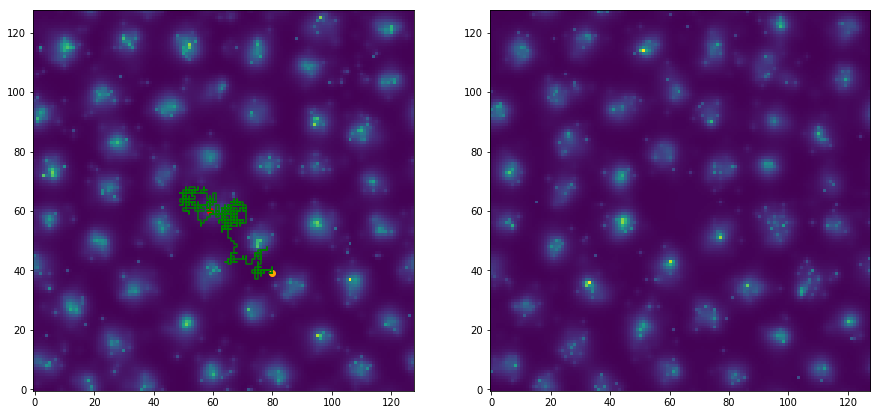

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

police_data = pd.read_csv("greedy_results.csv")
data = np.load("resultFile.npz")
fig ,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,10))
policeX = police_data.policeX.values
policeY = police_data.policeY.values

ax1.scatter(policeX[0], policeY[0], color='red')
ax1.scatter(policeX[-1], policeY[-1], color='orange')
ax1.plot(policeX, policeY, color='green')
ax1.imshow(data['B'])
ax2.imshow(cw.B)
ax1.invert_yaxis()
ax2.invert_yaxis()
# ax2.gca().invert_yaxis()
# plt.imshow(cw.B)
# plt.imshow(e3_inital['totalC'])
plt.show()
